In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
%matplotlib inline
import matplotlib.pyplot as plt
import contextily as ctx # Für Hintergrundkarte
folderpath=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Daten_BR_Handelsreg"
folderpath_geo=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Geodaten"

Auf windows funktioniert die Instellation von contextil am besten via conda-Befehl. (anders gehts nicht)
- conda install contextily --channel conda-forge


# Geodaten anpassen
Hier gefunden:
https://www.bfs.admin.ch/bfs/de/home/dienstleistungen/geostat/geodaten-bundesstatistik/administrative-grenzen/generalisierte-gemeindegrenzen.html


In [2]:
df_sauber_fehlende_adressen=pd.read_csv(folderpath+"/BRFrames/Adressen_alle3713_mit_telbuch_geocode_angepasst_ursprung_df.csv")
df_feh_geo=df_sauber_fehlende_adressen[["Adresse", "Firmen","Telbuch", "lat", "lon"]]
df_feh_geo['Punkt'] = df_feh_geo.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
gdf_feh=gpd.GeoDataFrame(df_feh_geo, geometry="Punkt")

In [3]:
df_feh_geo=df_sauber_fehlende_adressen[["Adresse", "Firmen","Telbuch", "lat", "lon"]]

In [4]:
df_feh_geo.dtypes

Adresse     object
Firmen       int64
Telbuch      int64
lat        float64
lon        float64
dtype: object

In [52]:
df_feh_geo['Punkt'] = df_feh_geo.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_feh_geo.sort_values("lon").head(50)

,Adresse,Firmen,Telbuch,lat,lon,Punkt
1872,"Wartrain 2, Hünenberg",1,0,36.778261,-119.417932,POINT (-119.41793 36.77826)
1867,"Wartrain , Hünenberg",1,3,36.778261,-119.417932,POINT (-119.41793 36.77826)
1870,"Wartrain 1, Hünenberg",1,2,36.778261,-119.417932,POINT (-119.41793 36.77826)
2020,"Schlossberg 10B, 03 Risch",1,0,36.778261,-119.417932,POINT (-119.41793 36.77826)
1002,"Schlossweg 7, 02 Buonas",2,0,36.778261,-119.417932,POINT (-119.41793 36.77826)
2019,"Schlossberg 11A, 03 Risch",1,0,36.778261,-119.417932,POINT (-119.41793 36.77826)
1096,"Schlattwäldli 3, Hünenberg",2,3,36.778261,-119.417932,POINT (-119.41793 36.77826)
2017,"Schlossberg 3A, 03 Risch",1,0,36.778261,-119.417932,POINT (-119.41793 36.77826)
974,"Reusshalde 1, Hünenberg",3,3,36.778261,-119.417932,POINT (-119.41793 36.77826)
2014,"Schlossberg 8B, 03 Risch",1,0,36.778261,-119.417932,POINT (-119.41793 36.77826)


In [54]:
gdf_feh=gpd.GeoDataFrame(df_feh_geo, geometry="Punkt")

(8.2, 8.7)

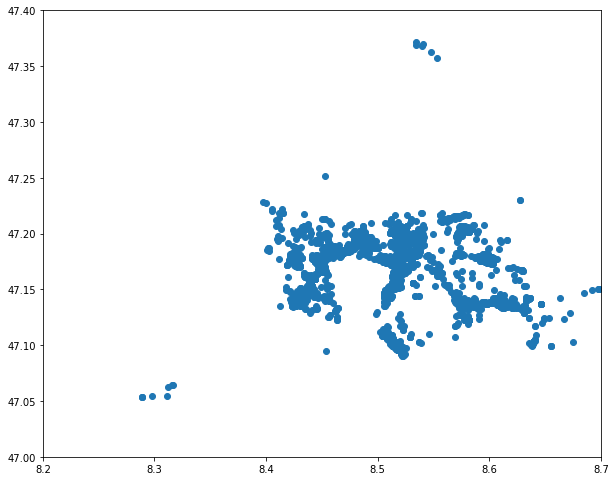

In [56]:
#offenbar sind einige Punkte ausserhalb von Zug lokalisiert worden. Vielleicht Fehler der API
# Hier sieht das doch schon viiiel besser aus.
ax = gdf_feh.plot(figsize=(10,15))

ax.set_ylim([47,47.4])
ax.set_xlim([8.2, 8.7])

In [57]:
gdf_feh.crs=({'init' :'epsg:4326'})

In [34]:
gdf_gemeinden = gpd.read_file(folderpath_geo+'/ggg_2019-LV95/shp/g1a19.shp')
gdf_zg=gdf_gemeinden[gdf_gemeinden["AName"]=="Zug"]

In [58]:
gdf_zg_es=gdf_zg.to_crs(epsg=3857)
gdf_feh_es=gdf_feh.to_crs(epsg=3857)

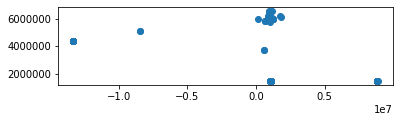

In [59]:
gdf_feh_es.plot()

In [10]:
gdf_zg.crs

{'init': 'epsg:2056'}

In [74]:
gdf_hr.crs=({'init' :'epsg:2056'}) #Zuerst crs. geben
gdf_hr_es=gdf_hr.to_crs(epsg=3857)# umwandeln in Merkator

(945000, 950000)

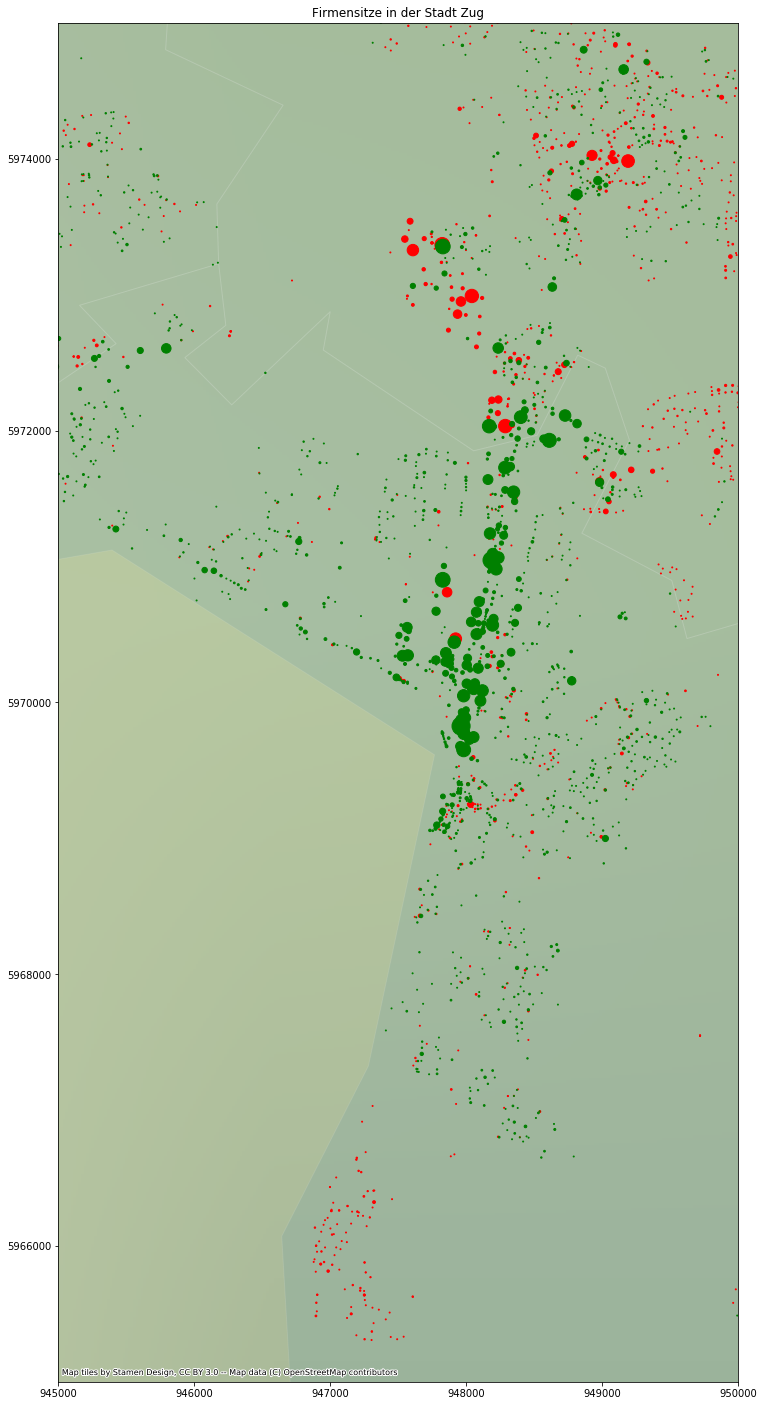

In [78]:
ax = gdf_zg_es.plot(figsize=(20,25), alpha=0.1, edgecolor='white')
gdf_feh_es.plot(figsize=(20,25),color="red", markersize=gdf_feh['Firmen'], ax=ax)
gdf_hr_es.plot(figsize=(20,25),color="green", markersize=gdf_hr['Firmen'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ctx.add_basemap(ax)
ax.set_ylim([5965000,5975000])
ax.set_xlim([945000, 950000])

(935000, 970000)

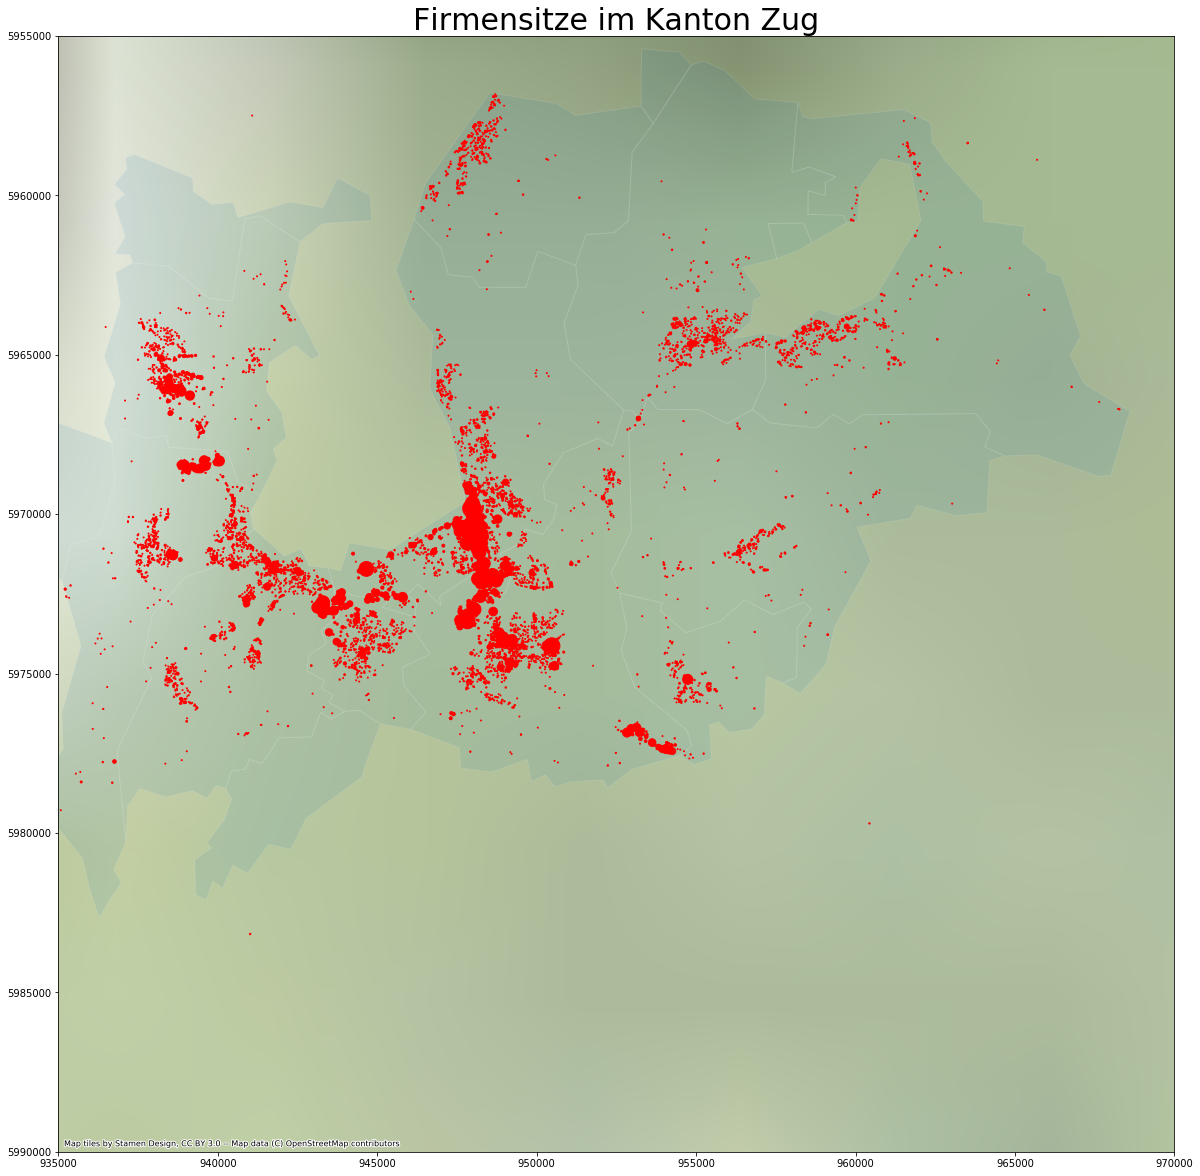

In [81]:
ax = gdf_zg_es.plot(figsize=(20,25), alpha=0.1, edgecolor='white')
gdf_hr_es.plot(figsize=(20,25), markersize=gdf_hr["Firmen"],color="red", ax=ax)
gdf_feh_es.plot(figsize=(20,25),color="red", markersize=gdf_feh['Firmen'], ax=ax)
ax.set_title("Firmensitze im Kanton Zug",fontsize=30)
ctx.add_basemap(ax)
ax.set_ylim([5990000, 5955000])
ax.set_xlim([935000, 970000])

# File mit den HR-Daten 


In [61]:
df_sauber=pd.read_csv(folderpath+"/BRFrames/Kanton_ganz_mit_Vergleichswert")

In [62]:
dfhr=df_sauber[["Adresse", "Firmen","Telbuch","Vergleich", "GDENAME", "GKODE","GKODN"]]

In [63]:
dfhr.dtypes

Adresse       object
Firmen         int64
Telbuch        int64
Vergleich    float64
GDENAME       object
GKODE        float64
GKODN        float64
dtype: object

In [64]:
# Nun nur jene Adressen rausfiltern, an welchen Firmen ansässig sind
dfhr_pl=dfhr[dfhr["Firmen"]>0]

In [65]:
# Noch eine Spalte kreieren mit der Wurzel aus der Anzahl Firmen (kann so evtl besser dargestellt werden)
dfhr_pl["Wurzelwert"]=dfhr_pl["Firmen"]**(1/2)

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
dfhr_pl

,Adresse,Firmen,Telbuch,Vergleich,GDENAME,GKODE,GKODN,Wurzelwert
0,"Zugerstrasse 74, Baar",164,12,13.666667,Baar,2681933.977,1226416.568,12.806248
1,"Mühlegasse 18, Baar",92,57,1.614035,Baar,2682425.299,1228159.836,9.591663
2,"Blegistrasse 11b, Baar",88,13,6.769231,Baar,2685739.840,1230044.629,9.380832
3,"Sihlbruggstrasse 105, Baar",80,39,2.051282,Baar,2684903.579,1229684.742,8.944272
4,"Ruessenstrasse 12, Baar",75,16,4.687500,Baar,2685107.750,1229580.996,8.660254
...,...,...,...,...,...,...,...,...
6968,"Chamerstrasse 45, Zug",2,5,0.400000,Zug,2680878.372,1225294.140,1.414214
6970,"Chamerstrasse 47, Zug",1,4,0.250000,Zug,2680840.404,1225315.633,1.000000
6973,"Chamerstrasse 50, Zug",15,12,1.250000,Zug,2680869.425,1225328.661,3.872983
6976,"Chamerstrasse 52, Zug",11,5,2.200000,Zug,2680846.193,1225345.734,3.316625


In [67]:
# Kreieren der Angabe der Geometrie. Mit Hilfe der Gemeindekoordinaten.
dfhr_pl['Punkt'] = dfhr_pl.apply(lambda row: Point(row["GKODE"], row["GKODN"]), axis=1)

C:\Users\Zoe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
gdf_hr=gpd.GeoDataFrame(dfhr_pl, geometry="Punkt")

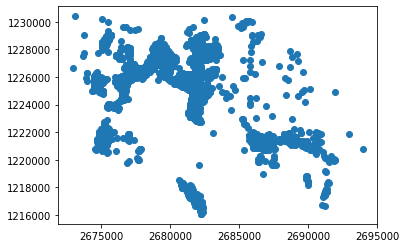

In [69]:
gdf_hr.plot()

Text(0.5, 1, 'Firmensitze im Kanton Zug')

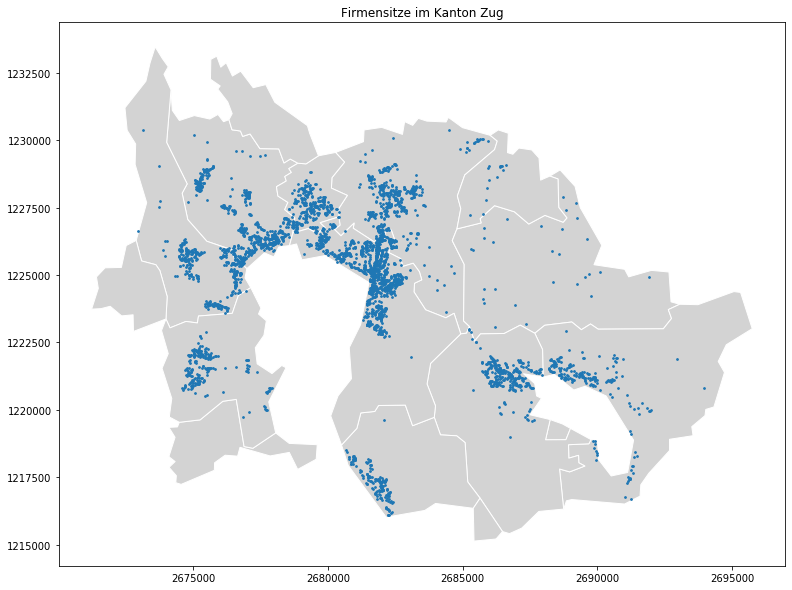

In [70]:
ax = gdf_zg.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)
ax.set_title("Firmensitze im Kanton Zug")

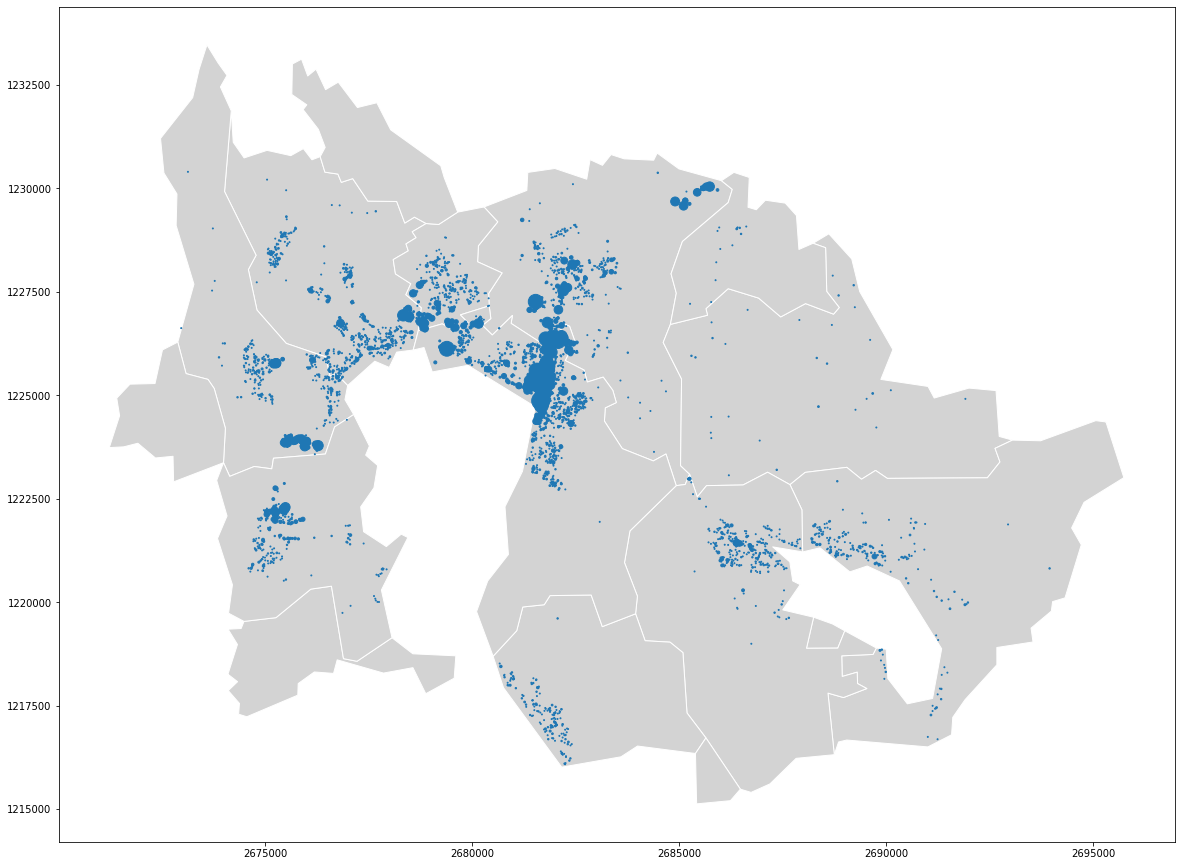

In [71]:
# Nun noch auf der Karte von der Stadt alleine
ax = gdf_zg.plot(figsize=(20,30), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,30), markersize=gdf_hr['Firmen'], ax=ax)

### Punkte in unterschiedlicher Grösse

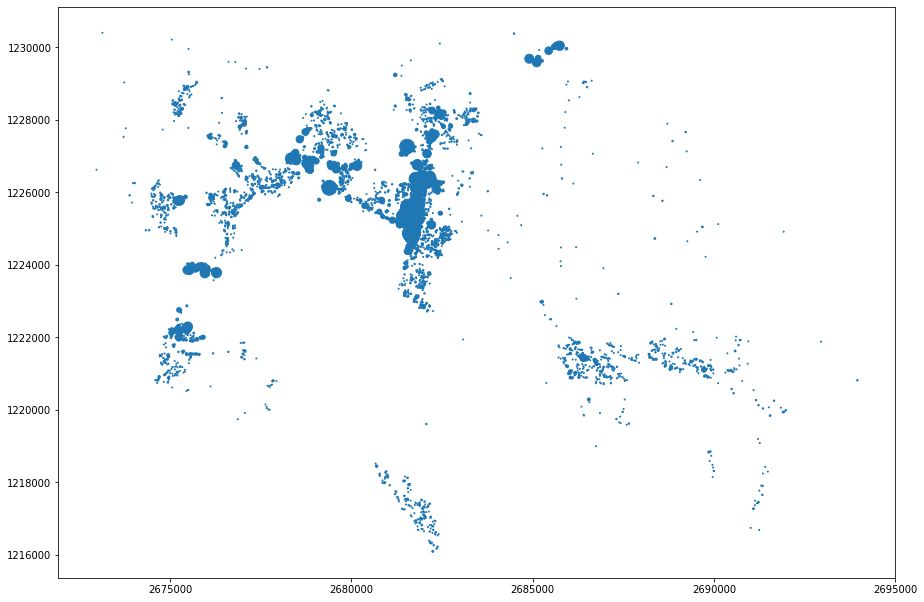

In [72]:
gdf_hr.plot(markersize=gdf_hr['Firmen'], figsize=(15,20))

Text(0.5, 1, 'Firmensitze in der Stadt Zug')

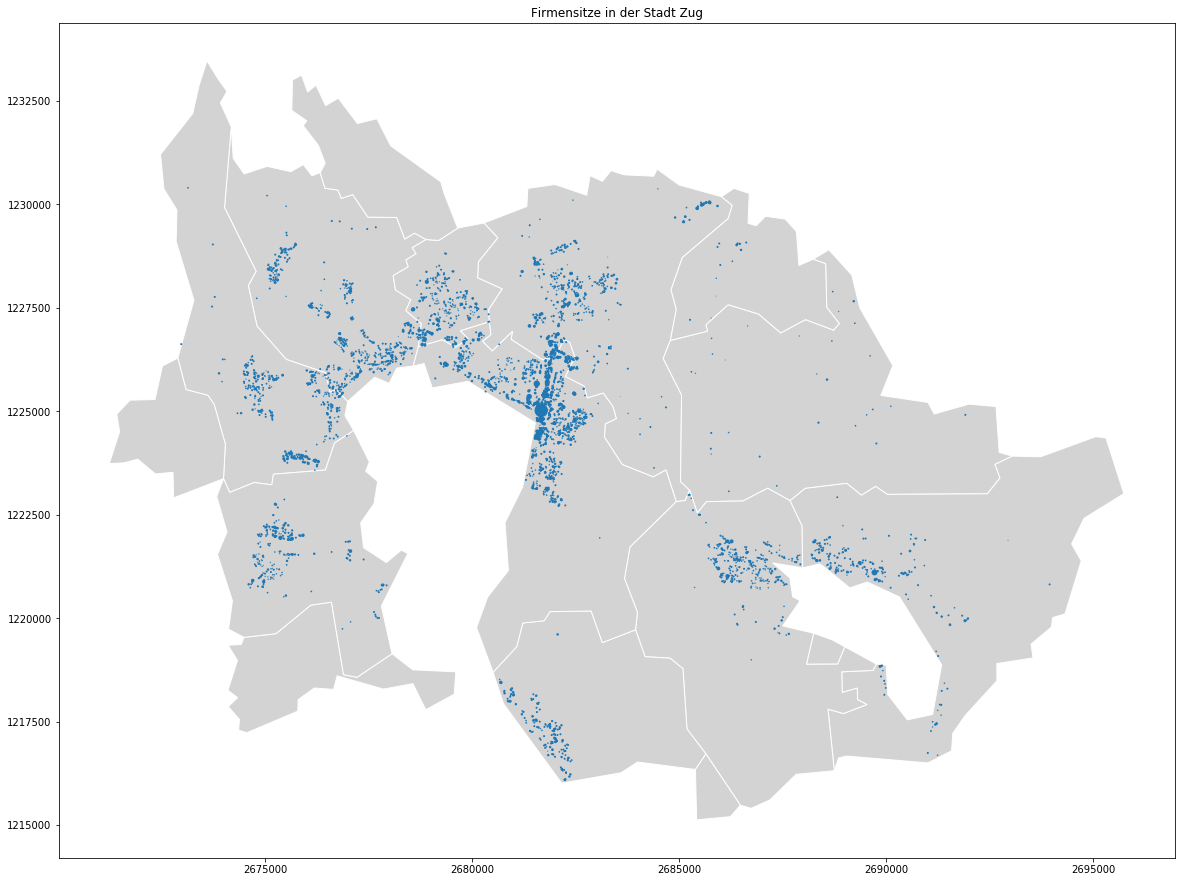

In [73]:
ax = gdf_zg.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=gdf_hr['Vergleich'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")

### Karte mit Strassen
um es für die Grafik einfacher zu machen, versuche ich die Punkte nun noch auf eine Strassenkarte zu plotten.

In [ ]:
gdf_strassen = gpd.read_file(folderpath_geo+'\Kanton_Zug_Strassen\shapefiles\kantonale_ausnahmetransportrouten\\route.shp')

In [ ]:
gdf_strassen.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(40,50))
gdf_strassen.plot(ax=ax, color='green', edgecolor='black', figsize=(30,40))

gdf_zg.plot(ax=ax, color='lightgrey', markersize=5,edgecolor='black', figsize=(30,40))

gdf_hr.plot(ax=ax, marker='o', color='red', markersize=gdf_hr['Firmen'], figsize=(30,40))

plt.show()



### Nun noch mit Strasse für die Stadt Zug

In [ ]:
fig, ax = plt.subplots(figsize=(30,40))
gdf_strassen.plot(ax=ax, color='green', edgecolor='black', figsize=(20,30))

gdf_stadtzug.plot(ax=ax, color='lightgrey', markersize=5,edgecolor='black', figsize=(20,30))

gdf_hr.plot(ax=ax, marker='o', color='red', markersize=gdf_hr['Vergleich'], figsize=(20,30))

plt.show()
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])

#### Nun auch für die Strassen nur Zug. Vielleicht mit Hilfe der overlay-Funktion?

In [ ]:
#Intersection funktioniert nicht, da ich nur Linien habe
gdfkarte= gpd.overlay(gdf_strassen, gdf_stadtzug, how='intersection')

In [ ]:
#vielleicht mit add_basemap. 
ax = gdf_zg.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=gdf_hr['Firmen'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])
ctx.add_basemap(ax, zoom=12)
# Hmm noch nicht das was es sein sollte. Vielleicht noch Format anpassen

#### Wie bringe ich die Punkte zusammen mit der Karte hin
Ich muss zuerst dem gdf_hr ein crs-Format geben. Danach in das Merkator-Format umwandeln.

In [ ]:
gdf_zg_es=gdf_zg.to_crs(epsg=3857) #umwalndeln in Merkator
gdf_hr.crs=({'init' :'epsg:2056'}) #Zuerst crs. geben
gdf_hr_es=gdf_hr.to_crs(epsg=3857)# umwandeln in Merkator

In [ ]:
gdf_zg.crs

In [ ]:
gdf_zg_es.crs 

In [ ]:
gdf_hr.crs

In [ ]:
gdf_hr_es.crs

In [ ]:
ax = gdf_zg_es.plot(figsize=(20,25), alpha=0.1, edgecolor='white')
gdf_hr_es.plot(figsize=(20,25), markersize=3,color="red", ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ctx.add_basemap(ax)

# Die PUnkte kommen einfach nicht mehr... 
#https://gis.stackexchange.com/questions/283677/geometry-data-in-geodataframe-will-not-plot (vielleicht da was)

# Hier mit der Grösse der Firmen
Je mehr Firmen desto grösser der Punkt

In [ ]:
ax = gdf_zg_es.plot(figsize=(20,25), alpha=0.2, edgecolor='white')
gdf_hr_es.plot(figsize=(20,25), markersize=gdf_hr['Firmen'],color="red", ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ctx.add_basemap(ax)


# Hier mit dem Vergleichswert 
Die Stadt Zug kristallisiert sich heraus - die anderen Hubs werden kleiner 

In [ ]:
ax = gdf_zg_es.plot(figsize=(20,25), alpha=0.2, edgecolor='white')
gdf_hr_es.plot(figsize=(20,25), markersize=gdf_hr['Vergleich'],color="red", ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ctx.add_basemap(ax)

In [ ]:
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])

In [ ]:
gdf_landeskarte = gpd.read_file(folderpath_geo+'\Landeskarte\geothermie.shp')

In [ ]:
gdf_landeskarte

In [ ]:
gdf_landeskarte.plot()

In [ ]:
ax = gdf_zg.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)

In [ ]:
gdfstr=gpd.read_file(folderpath_geo+"\Strassendaten\Shapefiles\09_DKM1M_STRASSE_PKT.shp")